In [24]:
!pip install -U hopsworks --quiet

In [25]:
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
import hopsworks
import pandas as pd

In [27]:
project = hopsworks.login()
fs = project.get_feature_store()

Connection closed.
Connected. Call `.close()` to terminate connection gracefully.



Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/188566
Connected. Call `.close()` to terminate connection gracefully.


In [28]:
wine_df = pd.read_csv("https://raw.githubusercontent.com/ID2223KTH/id2223kth.github.io/master/assignments/lab1/wine.csv")
wine_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [39]:
wine_df.columns = [col.lower().replace(' ', '_') for col in wine_df.columns]
wine_df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 5295 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         5295 non-null   float64
 1   volatile_acidity      5295 non-null   float64
 2   citric_acid           5295 non-null   float64
 3   residual_sugar        5295 non-null   float64
 4   chlorides             5295 non-null   float64
 5   free_sulfur_dioxide   5295 non-null   float64
 6   total_sulfur_dioxide  5295 non-null   float64
 7   density               5295 non-null   float64
 8   ph                    5295 non-null   float64
 9   sulphates             5295 non-null   float64
 10  alcohol               5295 non-null   float64
 11  quality               5295 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 537.8 KB


KeyError: "['type'] not found in axis"

In [31]:
wine_df.duplicated().sum() #get rid of duplicated data

1168

In [32]:
wine_df.drop_duplicates(inplace=True)
wine_df.duplicated().sum()

0

In [33]:
wine_df.dropna(inplace=True)
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5295 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  5295 non-null   object 
 1   fixed_acidity         5295 non-null   float64
 2   volatile_acidity      5295 non-null   float64
 3   citric_acid           5295 non-null   float64
 4   residual_sugar        5295 non-null   float64
 5   chlorides             5295 non-null   float64
 6   free_sulfur_dioxide   5295 non-null   float64
 7   total_sulfur_dioxide  5295 non-null   float64
 8   density               5295 non-null   float64
 9   ph                    5295 non-null   float64
 10  sulphates             5295 non-null   float64
 11  alcohol               5295 non-null   float64
 12  quality               5295 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 579.1+ KB


Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


NameError: name 'dtype' is not defined

In [34]:
plt.figure(figsize=(10,10))
corr = wine_df.corr()
sns.heatmap(corr ,annot=True , cmap= 'Blues');

ValueError: could not convert string to float: 'white'

<Figure size 1000x1000 with 0 Axes>

<Axes: xlabel='quality', ylabel='type'>

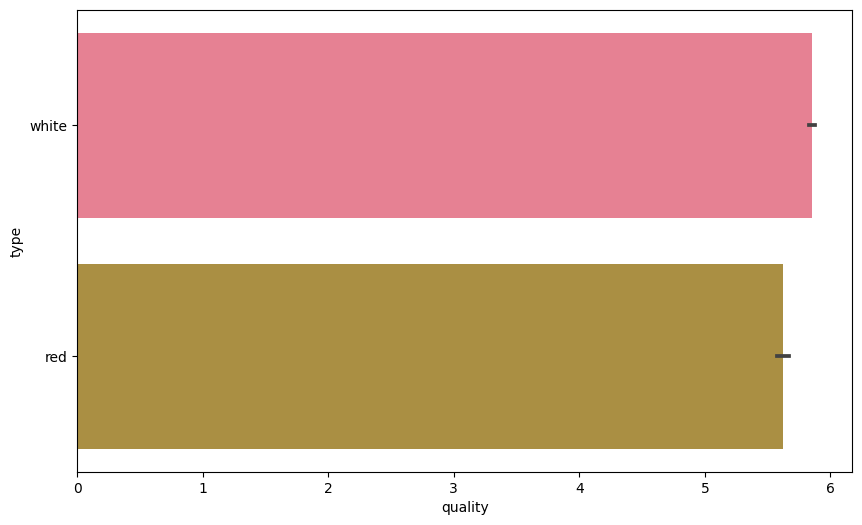

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'type', data = wine_df)

<Axes: xlabel='quality', ylabel='fixed acidity'>

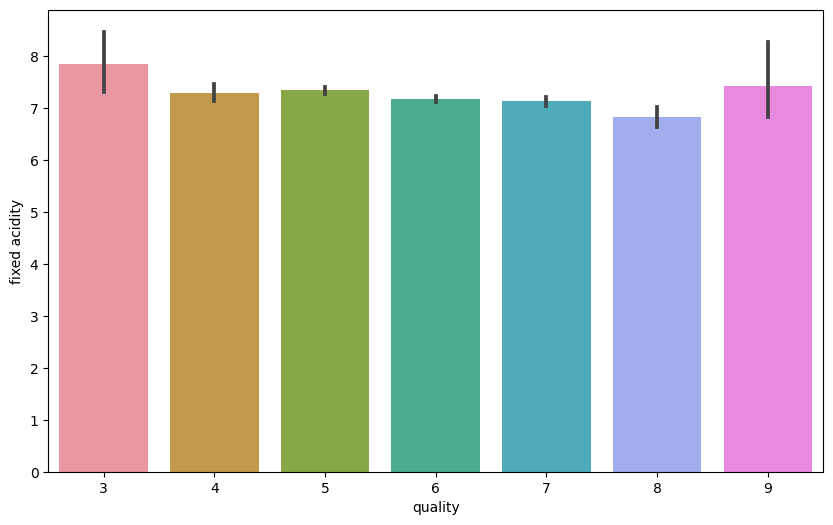

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed_acidity', data = wine_df)

<Axes: xlabel='quality', ylabel='volatile acidity'>

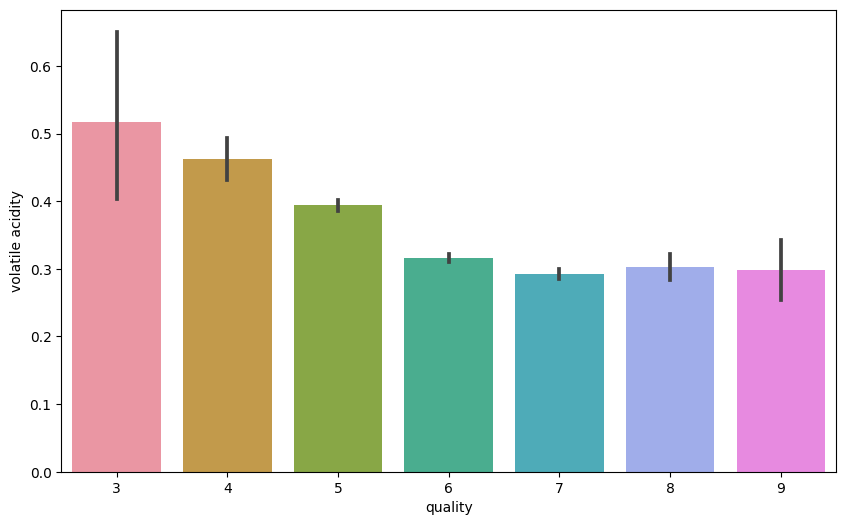

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile_acidity', data = wine_df)

<Axes: xlabel='quality', ylabel='citric acid'>

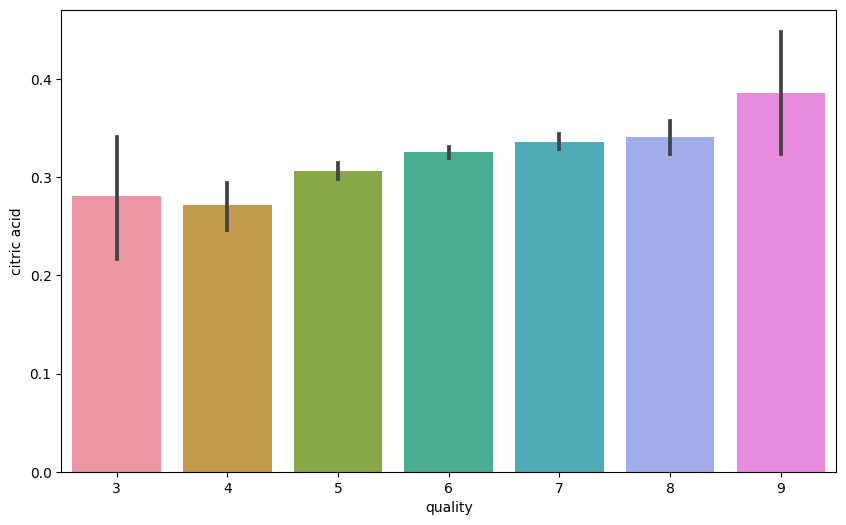

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric_acid', data = wine_df)

<Axes: xlabel='quality', ylabel='residual_sugar'>

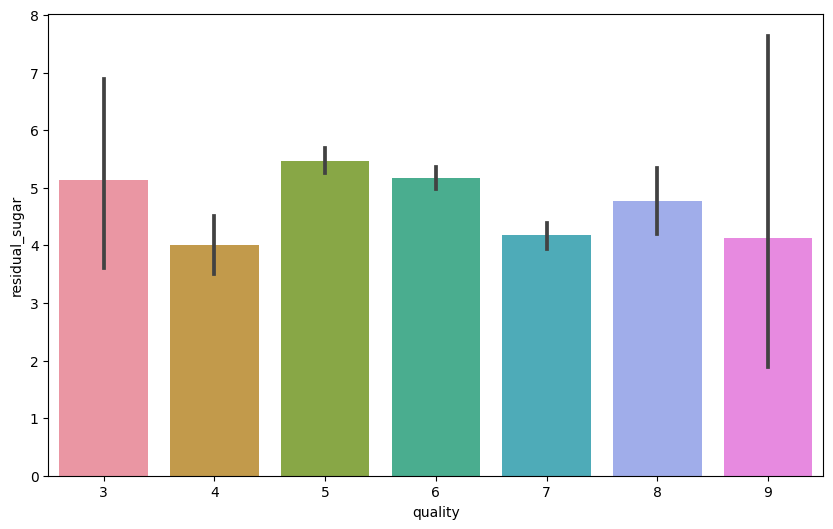

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual_sugar', data = wine_df)

In [ ]:
wine_fg = fs.get_or_create_feature_group(
    name="wine",
    version=1,
    primary_key=["fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides","free_sulfur_dioxide","total_sulfur_dioxide","density","ph","sulphates","alcohol"],
    description="Wine dataset")
wine_fg.insert(wine_df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/188566/fs/188485/fg/230757


Uploading Dataframe: 0.00% |          | Rows 0/5295 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: wine_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/188566/jobs/named/wine_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x7c9ea0d6d000>, None)